<a href="https://colab.research.google.com/github/Stroper-Flame/TPLN-Proyecto-Final/blob/main/Proyecto_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos las dependencias básicas
!pip install scikit-learn pandas matplotlib seaborn

In [ ]:
import pandas as pd

# URLs del repositorio
url_train = 'https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/training_set.tsv'
url_test = 'https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/test_set.tsv'

# Carga de datos
df_train = pd.read_csv(url_train, sep='\t')
df_test = pd.read_csv(url_test, sep='\t')

# Mapeo Binario
# NO/NOE -> 0 (No Ofensivo)
# OFP/OFG -> 1 (Ofensivo)
binary_mapping = {'NO': 0, 'NOE': 0, 'OFP': 1, 'OFG': 1}
df_train['label_binary'] = df_train['label'].map(binary_mapping)
df_test['label_binary'] = df_test['label'].map(binary_mapping)


In [ ]:
# Vamos atratar de recuperar el significado de los iconos
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
import emoji
import re

# Nueva función de limpieza
# Ahora usamos emoji.demojize antes de borrar caracteres.
def clean_text(text):
    text = str(text)

    #Traducimos emojis a texto
    text = emoji.demojize(text, language='es', delimiters=(" ", " "))

    # Pasamos a minúsculas
    text = text.lower()

    # Limpieza de caracteres (permitimos guiones bajos _ por los emojis)
    text = re.sub(r'[^a-záéíóúñ0-9\s_]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicamos la limpieza
df_train['comment_clean'] = df_train['comment'].apply(clean_text)
df_test['comment_clean'] = df_test['comment'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorización
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train['comment_clean'])
X_test = vectorizer.transform(df_test['comment_clean'])

y_train = df_train['label_binary']
y_test = df_test['label_binary']

# Entrenamiento
svm_v2 = LinearSVC(random_state=42, max_iter=2000)
svm_v2.fit(X_train, y_train)

# Predicción
y_pred_v2 = svm_v2.predict(X_test)

print("Fin del entrenamiento")

Fin del entrenamiento


Resultados:
              precision    recall  f1-score   support

 No Ofensivo       0.89      0.98      0.93     11055
    Ofensivo       0.81      0.45      0.58      2551

    accuracy                           0.88     13606
   macro avg       0.85      0.71      0.75     13606
weighted avg       0.87      0.88      0.86     13606



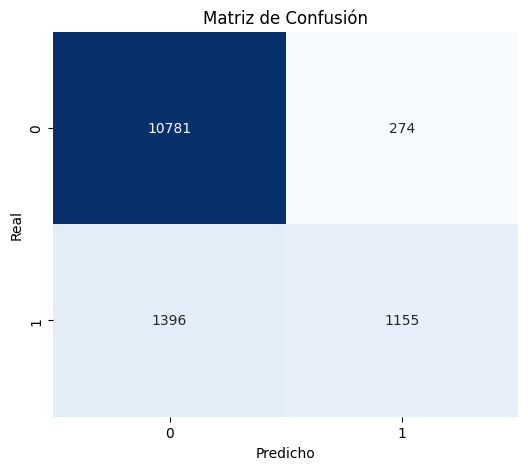

In [ ]:
print("Resultados:")
print(classification_report(y_test, y_pred_v2, target_names=['No Ofensivo', 'Ofensivo']))

# Matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_v2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()
